<center>
    <h1>CREDIT RISK ANALYZER</h1>
</center>

<h2>1. Introduction:</h2>
<h3>Context</h3>
Banks need to protect their interest before it can take risk on you and issue credit card to you. Banks use their previous credit card holders records for understanding the patterns of the card holders. It is a lot more complex process to predict whether a person who they do not know at personal level, will be a defaulter or not. Banks, along with the data from their own records, also use CIBIL data.
Based on all this data, banks want to develop a pattern that will tell them who are likely to be a defaulter and who are not.
We have to use this dataset to generate a decision tree model that can successfully predict for a new applicant with recorded data for given parameters in the data set, if he is likely to be a defaulter.


<h3>Content</h3>
The dataset has 13 features with 50636 observations. The features are:
<img src="files/attributes.png">

Here <b>age, gender</b> are the age and gender of the card holder.<br>
<b>education</b> is the last acquired educational qualification of the card holder.<br>
<b>occupation</b> can be salaried, or self employed or business etc. <br>
<b>organization_type</b> can be tire 1, 2, 3 etc.<br> 
<b>seniority</b> denotes at which career level the card holder is in.<br> 
<b>annual_income</b> is the gross annual income of the card holder.<br> 
<b>disposable_income</b> is annual income - recurring expenses.<br> 
<b>house_type</b> is owned or rented or company provided etc.<br> 
<b>vehicle_type</b> is 4-wheeler or two-wheeler or none.<br> 
<b>marital_status</b> is of the card holder.<br> 
<b>no_card</b> has the information of the number of other credit cards that the card holder already holds. <br>
And at the end of each row, we have a <b>defaulter</b> indicator indicating whether the card holder was a defaulter or not. It is 1 if the card holder was a defaulter, 0 otherwise.

<h2>2. Import Libraries:</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

<h2>3. Load Dataset:</h2>

In [2]:
df = pd.read_csv('credit_data.csv')

<h2>4. Data Exploratory Analysis:</h2>

In [3]:
df.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


In [4]:
df.columns

Index(['age', 'gender', 'education', 'occupation', 'organization_type',
       'seniority', 'annual_income', 'disposable_income', 'house_type',
       'vehicle_type', 'marital_status', 'no_card', 'default'],
      dtype='object')

In [5]:
df.shape

(50636, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
age                  50636 non-null int64
gender               50636 non-null object
education            50636 non-null object
occupation           50636 non-null object
organization_type    50636 non-null object
seniority            50636 non-null object
annual_income        50636 non-null int64
disposable_income    50636 non-null int64
house_type           50636 non-null object
vehicle_type         50636 non-null object
marital_status       50636 non-null object
no_card              50636 non-null int64
default              50636 non-null int64
dtypes: int64(5), object(8)
memory usage: 5.0+ MB


In [7]:
df.isnull().sum()

age                  0
gender               0
education            0
occupation           0
organization_type    0
seniority            0
annual_income        0
disposable_income    0
house_type           0
vehicle_type         0
marital_status       0
no_card              0
default              0
dtype: int64

In [8]:
df.describe()

,age,annual_income,disposable_income,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,277243.989889,18325.788569,0.509815,0.158425
std,8.816532,153838.973755,12677.864844,0.669883,0.365142
min,18.000000,50000.000000,1000.000000,0.000000,0.000000
25%,25.000000,154052.250000,8317.750000,0.000000,0.000000
50%,27.000000,258860.500000,15770.000000,0.000000,0.000000
75%,30.000000,385071.500000,24135.000000,1.000000,0.000000
max,64.000000,999844.000000,49999.000000,2.000000,1.000000


In [9]:
df['default'].value_counts()

0    42614
1     8022
Name: default, dtype: int64

In [10]:
obj_df = df.select_dtypes(include=['object']).copy()

In [11]:
obj_df.head()

,gender,education,occupation,organization_type,seniority,house_type,vehicle_type,marital_status
0,Male,Graduate,Professional,None,None,Family,None,Married
1,Male,Under Graduate,Professional,None,None,Rented,None,Married
2,Male,Under Graduate,Salaried,None,Entry,Rented,None,Married
3,Male,Graduate,Student,None,None,Rented,None,Married
4,Male,Post Graduate,Salaried,None,Mid-level 1,Rented,None,Married


In [12]:
#Looking unique values
print(obj_df.nunique())


gender               2
education            4
occupation           4
organization_type    4
seniority            6
house_type           4
vehicle_type         3
marital_status       3
dtype: int64


In [13]:
print("Gender : ",obj_df.gender.unique())
print("Education : ",obj_df.education.unique())
print("Occupation : ",obj_df.occupation.unique())
print("Organization Type : ",obj_df.organization_type.unique())
print("Seniority : ",obj_df.seniority.unique())
print("House Type : ",obj_df.house_type.unique())
print("Vehicle Type : ",obj_df.vehicle_type.unique())
print("Marital Status : ",obj_df.marital_status.unique())

Gender :  ['Male' 'Female']
Education :  ['Graduate' 'Under Graduate' 'Post Graduate' 'Other']
Occupation :  ['Professional' 'Salaried' 'Student' 'Business']
Organization Type :  ['None' 'Tier 3' 'Tier 2' 'Tier 1']
Seniority :  ['None' 'Entry' 'Mid-level 1' 'Junior' 'Mid-level 2' 'Senior']
House Type :  ['Family' 'Rented' 'Company provided' 'Owned']
Vehicle Type :  ['None' 'Two Wheeler' 'Four Wheeler']
Marital Status :  ['Married' 'Single' 'Other']


<h2>5. Data Visualization:</h2>

In [14]:
def plot_bar_graph(column_name):
    ed_count = column_name.value_counts()
    sns.set(style="darkgrid")
    sns.barplot(ed_count.index, ed_count.values, alpha=0.9)
    plt.title('Frequency Distribution of {} Levels using Bar Plot'.format(column_name.name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('{}'.format(column_name.name), fontsize=12)
    plt.show() 
    

In [15]:
def plot_pie_graph(column_name):
    labels = column_name.astype('category').cat.categories.tolist()
    counts = column_name.value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title('Frequency Distribution of {} Levels using Pie Chart'.format(column_name.name))
    plt.show()

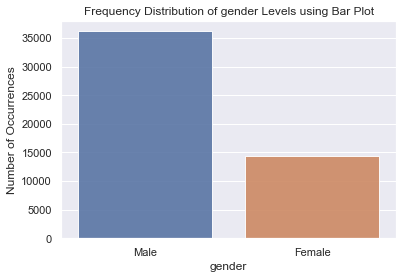

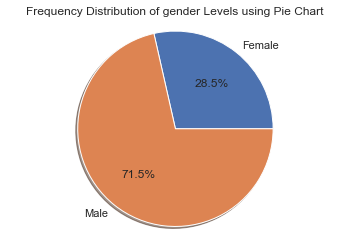

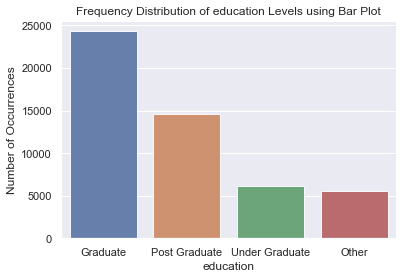

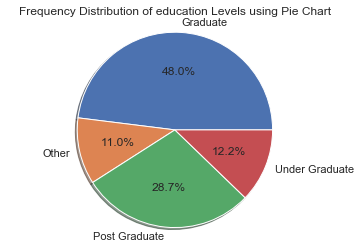

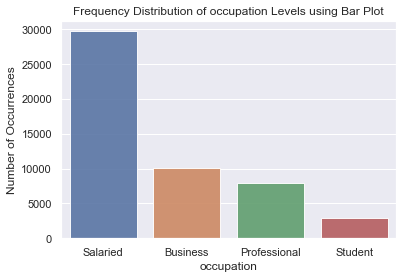

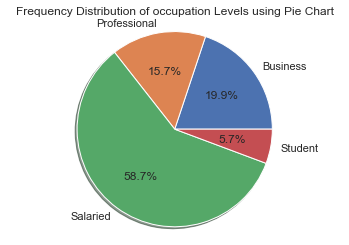

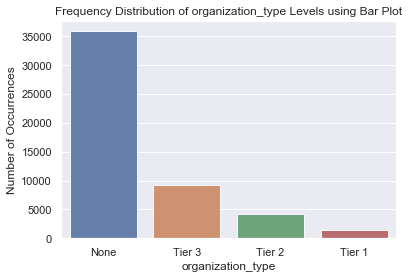

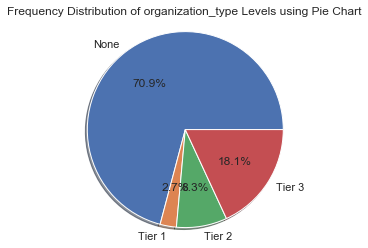

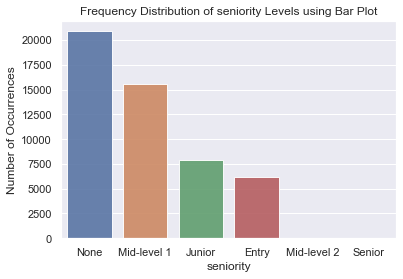

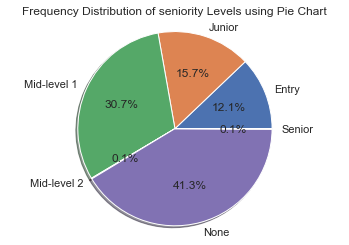

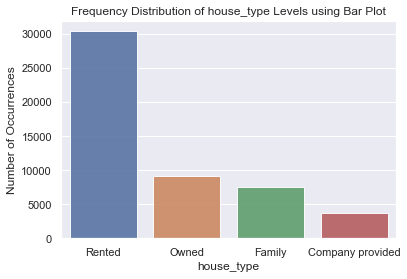

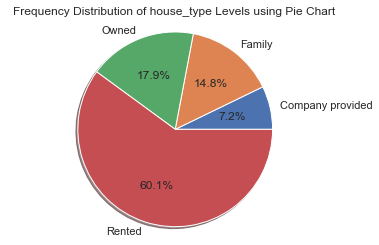

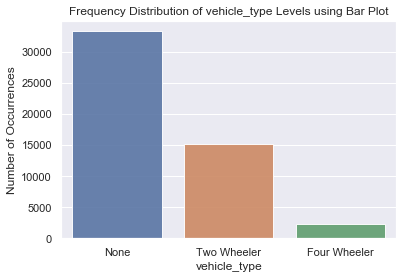

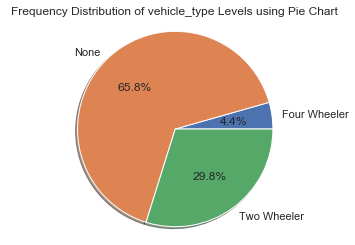

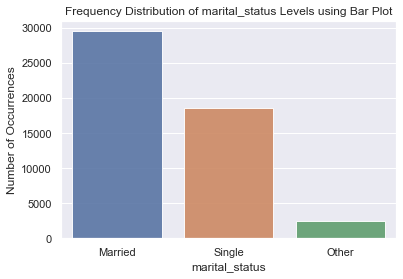

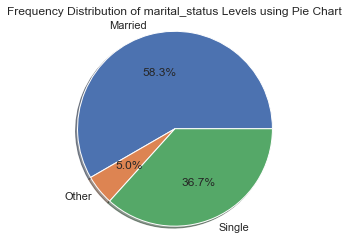

In [16]:
for col in obj_df.columns:
    plot_bar_graph(obj_df[col])
    plot_pie_graph(obj_df[col])

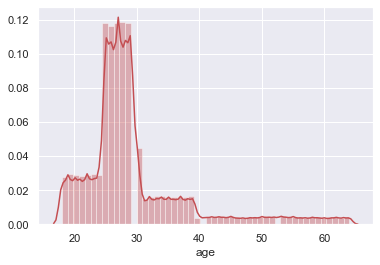

In [17]:
sns.distplot(df.age, color="r")
plt.show()

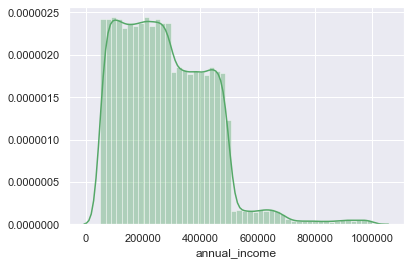

In [18]:
sns.distplot(df.annual_income, color="g")
plt.show()

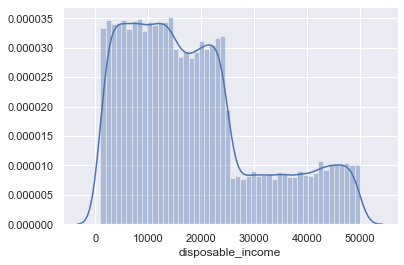

In [19]:
sns.distplot(df.disposable_income, color="b")
plt.show()

<h2>6. Data Preprocessing:</h2>

<h3>Converting Categorical Data to Numerical Data:</h3>

In [20]:
def convert_cat_to_num(columns):
    for col in columns:
        df[col] = pd.factorize(df[col])[0]
convert_cat_to_num(df.select_dtypes(include=['object']))
df.head(10)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,0,0,0,0,0,186319,21625,0,0,0,0,1
1,18,0,1,0,0,0,277022,20442,1,0,0,0,1
2,29,0,1,1,0,1,348676,24404,1,0,0,1,1
3,18,0,0,2,0,0,165041,2533,1,0,0,0,1
4,26,0,2,1,0,2,348745,19321,1,0,0,1,1
5,26,1,3,2,0,0,404972,22861,0,0,1,0,1
6,28,0,1,2,0,0,231185,20464,0,0,0,0,1
7,24,1,1,1,0,1,102554,42159,0,0,0,1,1
8,26,1,1,1,0,3,226786,19817,0,0,1,0,1
9,26,0,0,1,0,2,250424,5271,0,1,0,1,1


In [21]:
featurecolumns = df.columns.difference(['default'])
featurecolumns

Index(['age', 'annual_income', 'disposable_income', 'education', 'gender',
       'house_type', 'marital_status', 'no_card', 'occupation',
       'organization_type', 'seniority', 'vehicle_type'],
      dtype='object')

<h3>Checking Data Correlation:</h3>

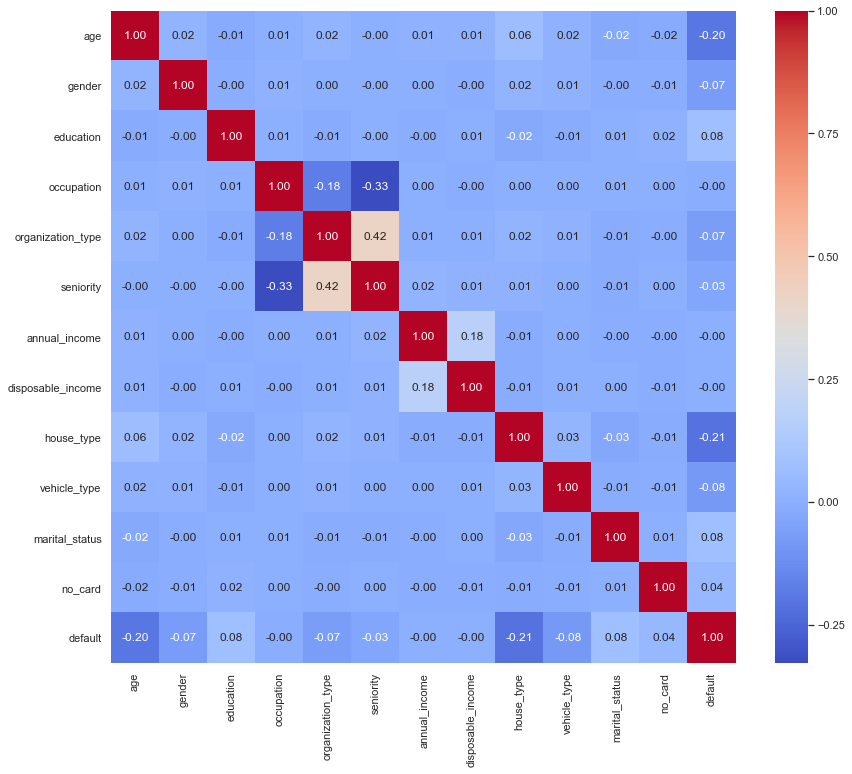

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

<h2>7. Splitting the Data:</h2>

In [23]:
train_X,test_X,train_y,test_y = train_test_split(df[featurecolumns],df['default'], test_size = 0.2, random_state =43)

In [24]:
print (train_X.shape, train_y.shape)
print (test_X.shape, test_y.shape)

(40508, 12) (40508,)
(10128, 12) (10128,)


<h2>8. Model Building and Diagnostics:</h2>

<h3>1. Decision Tree with Entropy Criterion:</h3>

In [25]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

In [26]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [27]:
y_pred_entropy=dtree.predict(test_X)

In [28]:
Score_entropy=accuracy_score(test_y,y_pred_entropy)
print("Accuracy: %0.2f" % (round(Score_entropy*100,2)))

Accuracy: 84.37


In [29]:
cm_dtclass = metrics.confusion_matrix(test_y,y_pred_entropy,labels = [1,0])
cm_dtclass

array([[ 509, 1134],
       [ 449, 8036]], dtype=int64)

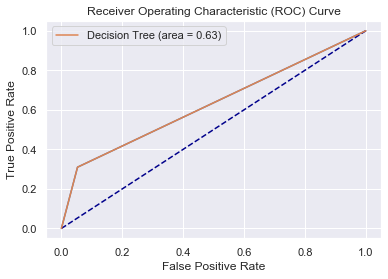

In [30]:
from sklearn.metrics import roc_curve,auc
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.plot(fper, tper, label='Decision Tree (area = %0.2f)' %auc(fper, tper))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = y_pred_entropy 
fper, tper, thresholds = roc_curve(test_y, probs) 
plot_roc_curve(fper, tper)

<h3>2. Decision Tree with Gini Criterion:</h3>

In [31]:
dtree.gini=DecisionTreeClassifier(criterion='gini',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

In [32]:
dtree.gini.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [33]:
y_pred_gini=dtree.gini.predict(test_X)

In [34]:
Score_gini=accuracy_score(test_y,y_pred_gini)
print("Accuracy: %0.2f" % (round(Score_gini*100,2)))

Accuracy: 84.24


In [35]:
cm_dtclass2 = metrics.confusion_matrix(test_y,y_pred_gini,labels = [1,0])
cm_dtclass2

array([[ 488, 1155],
       [ 441, 8044]], dtype=int64)

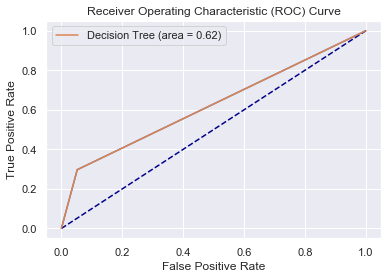

In [36]:
probs = y_pred_gini 
fper, tper, thresholds = roc_curve(test_y, probs) 
plot_roc_curve(fper, tper)

<h2>9. Cross Validation with Stratified K-Fold:</h2>

In [37]:
headers = list(df.columns.values)

In [38]:
x = df[headers[:-1]]
y = df[headers[-1:]].values.ravel()

In [39]:
skf = StratifiedKFold(n_splits=10)


In [44]:
def SKFold(x,y,skf,model):
    dtree_predicted_y = []
    dtree_expected_y = []
    dtree_scores = []
    
    for train_index, test_index in skf.split(x, y):
        # specific ".loc" syntax for working with dataframes
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
        model.fit(x_train, y_train)
        

        # store result from classification
        dtree_predicted_y = model.predict(x_test)
        
        # store expected result for this specific fold
        dtree_expected_y = y_test

    # save and print accuracy
        accuracy = metrics.accuracy_score(dtree_expected_y, dtree_predicted_y)
        dtree_scores.append(accuracy)
        print("Accuracy for {}: {} ".format(model.criterion,str(accuracy*100)))
        cm_class = metrics.confusion_matrix(dtree_expected_y, dtree_predicted_y,labels = [1,0])
        print(cm_class)
    print("\n")
    print("Max Accuracy for {}: {} ".format(model.criterion,str(np.max(dtree_scores)*100)))
    print("Min Accuracy for {}: {} ".format(model.criterion,str(np.min(dtree_scores)*100)))
    print("Mean Accuracy for {}: {} ".format(model.criterion,str(np.mean(dtree_scores)*100)))
    print("\n")

    
    

In [45]:
SKFold(x,y,skf,dtree)
SKFold(x,y,skf,dtree.gini)

Accuracy for entropy: 86.00197433366239 
[[ 315  488]
 [ 221 4041]]
Accuracy for entropy: 86.10069101678184 
[[ 337  466]
 [ 238 4024]]
Accuracy for entropy: 85.68325434439178 
[[ 322  480]
 [ 245 4017]]
Accuracy for entropy: 85.48578199052133 
[[ 318  484]
 [ 251 4011]]
Accuracy for entropy: 85.85818684574363 
[[ 324  478]
 [ 238 4023]]
Accuracy for entropy: 85.20639936796366 
[[ 284  518]
 [ 231 4030]]
Accuracy for entropy: 85.66067548884061 
[[ 316  486]
 [ 240 4021]]
Accuracy for entropy: 81.19691882283232 
[[  93  709]
 [ 243 4018]]
Accuracy for entropy: 80.50562907367174 
[[  50  752]
 [ 235 4026]]
Accuracy for entropy: 80.22911317400751 
[[  40  762]
 [ 239 4022]]


Max Accuracy for entropy: 86.10069101678184 
Min Accuracy for entropy: 80.22911317400751 
Mean Accuracy for entropy: 84.19286244584168 


Accuracy for gini: 86.14017769002962 
[[ 312  491]
 [ 211 4051]]
Accuracy for gini: 86.21915103652518 
[[ 339  464]
 [ 234 4028]]
Accuracy for gini: 85.18957345971565 
[[ 311  491]

<h2>10. Results:</h2>
<br>
Decision Tree with Entropy Criterion: 84.37 <br>
Decision Tree with Gini Criterion: 84.24<br>
Decision Tree with Entropy Criterion with Stratified K-Fold: 86.10<br>
Decision Tree with Gini Criterion with Stratified K-Fold: 86.22<br>
